# Machine Learning Model for Predicting House Prices


This project involves building and deploying a machine learning model (e.g., Linear Regression, Decision Tree, Random Forest, XGBoost) to predict house prices using regression techniques. The process includes data preprocessing, model training & evaluation, hyperparameter tuning, and API deployment.

#Part 1: Data Preprocessing:
- Load the dataset and perform exploratory data analysis (EDA).
- Handle missing values appropriately.
- Perform feature engineering (scaling, encoding categorical variables, feature selection).
- Visualize correlations between features and the target variable.


###Load Dataset & Exploratory Data Analysis (EDA)
- We will use the California Housing Dataset from sklearn.datasets as it is publicly available and well-structured.

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset

housing = fetch_california_housing()
housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_data['price'] = housing.target
housing_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The California Housing Dataset (from sklearn.datasets) provides house prices in hundreds of thousands of dollars rather than in exact dollar values. The housing.target values represent the **median house price** for each district in units of **$100,000**.

- **Example**

- If housing.target = 2.5, it means the actual median house price is $250,000.

- If housing.target = 1.8, it means the price is $180,000.

- To get the actual price in dollars, we have to multiply by 100,000:

- Regression models work better when target values are within a normal scale range. A very small target (2.5) may lead to unstable training behavior.

- Multiplying by 100000 ensures the house price is represented in actual dollars, improving interpretability and consistency in our regression modeling

In [ ]:
housing_data['price'] = housing.target * 100000

# Display dataset info
print(housing_data.info())
housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


###Handle Missing Values

In [ ]:
# Check missing values
print(housing_data.isnull().sum())

# No missing values in California Housing Dataset; otherwise, we can handle them using:
# housing_data.fillna(housing_data.median(), inplace=True)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


### Feature Engineering:
- Scaling: Standardize numerical features using StandardScaler
- Feature Selection: Check correlation with target variable
- Encoding: Handle categorical variables (not applicable here)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_variables = std_scaler.fit_transform(housing_data.drop(columns=['price']))


scaled_housing_data = pd.DataFrame(scaled_variables, columns = housing.feature_names)
scaled_housing_data['price'] = housing_data['price']

scaled_housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,452600.0
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,358500.0
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,352100.0
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,341300.0
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,342200.0


###Correlation Analysis

- it's best practice to compute correlation on the original dataset (housing_data) before scaling for better interpretability and feature selection.

- The Pearson correlation coefficient (which is what df.corr() computes by default) measures the strength and direction of relationships between features, but it is not affected by the scale of variables.

- The original dataset (housing_data) has features in their real-world units (e.g., MedInc in income, HouseAge in years). When viewing the correlation heatmap, it is easier to interpret real values rather than standardized values.

####Example:

- df.corr() might show "MedInc" has a correlation of 0.7 with "Price", meaning higher median income is strongly associated with higher house prices.
- If we use df_scaled.corr(), the interpretation remains the same, but the features are in unitless standardized form, making them harder to understand.

####Feature Selection & Engineering
- We often use correlation analysis before scaling to identify redundant or highly correlated features.
- If two features are highly correlated (>0.9), we may consider removing one of them.
- Doing this before scaling ensures we work with the original units of the features.


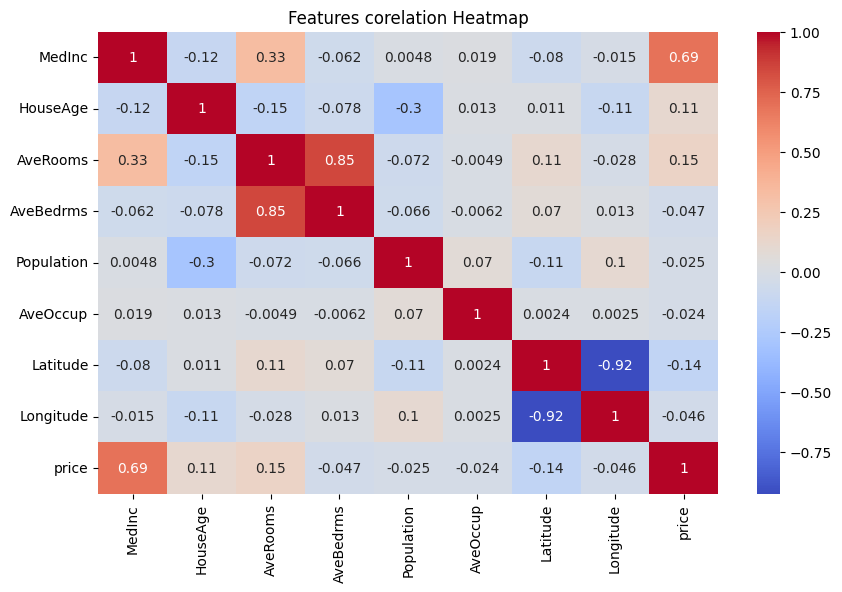

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(housing_data.corr(), annot=True, cmap= "coolwarm")
plt.title("Features corelation Heatmap")
plt.show()

# The most important predictor is Median Income (MedInc) with a strong correlation (0.69) with house prices.
# Weakly related features → AveRooms (0.15), HouseAge (0.11)
# Unimportant features → Population, AveOccup, Longitude
# Multicollinearity: AveRooms and AveBedrms are highly correlated (0.85). Keeping both may introduce redundancy.


# The correlation coefficient measures the strength and direction of a linear relationship between two variables.
# Positive Correlation (0 to +1) → As one variable increases, the other also increases.
# Negative Correlation (0 to -1) → As one variable increases, the other decreases.
# No Correlation (0) → No linear relationship.

#Part 2: Model Training & Evaluation

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = scaled_housing_data.drop(columns=['price'])
y = scaled_housing_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###Train Regression Models
We will test multiple models:

- Linear Regression
- Random Forest
- Decision Tree
- XGBoost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # To suppress minor warnings

# Difine models
models = {
    "Linear Regression": LinearRegression(),
    "Desion Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(estimators=100, learning_rate=0.1, random_state=42)

}

# Train the evaluate models
for name, model in models.items():
  model.fit(x_train,  y_train)
  y_pred = model.predict(x_test)

  print(f"Model: {name}")
  print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
  print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
  print(f"R2 score: {r2_score(y_test, y_pred):.2f}\n")

Model: Linear Regression
MAE: 53320.01
RMSE: 74558.14
R2 score: 0.58

Model: Desion Tree
MAE: 45444.61
RMSE: 70584.19
R2 score: 0.62

Model: Random Forest
MAE: 32833.38
RMSE: 50740.91
R2 score: 0.80

Model: XGBoost
MAE: 31545.10
RMSE: 47672.03
R2 score: 0.83



###Hyperparameter Tuning

- GridSearchCV for optimizing Random Forest.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Only test 10 random combinations instead of all 27
    scoring="r2",
    cv=3,  # Use 3-fold cross-validation (faster than 5-fold)
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

random_search.fit(x_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 20}


In [ ]:
# Extract the best model
best_model = random_search.best_estimator_

best_model

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f" **Best Model After Hyperparameter Tuning: {best_model}**")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R² Score: {r2:.4f}")


 **Best Model After Hyperparameter Tuning: RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)**
 Mean Absolute Error (MAE): 32790.85
 Mean Squared Error (MSE): 2560701366.19
 Root Mean Squared Error (RMSE): 50603.37
 R² Score: 0.8046


In [ ]:
import pickle

with open("housing_price_model.pkl", "wb") as f:
    pickle.dump(best_model, f)